In [33]:
# Import pandas
import geopandas
import geoplot
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [34]:
# Load in the listings data
df_data =pd.read_csv('/Users/estebanm/Desktop/2024-DS-Tue/Week-03-Data_Analytics-Data_Viz-BI_tools/data/listings.csv')

####  Exercise 1: Create a bar chart and dataframe of top 10 Neigborhoods that have the most expensive listsings on average. 
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

       neighbourhood       price
0           Allerton   92.813953
1      Arden Heights  119.200000
2           Arrochar  125.050000
3            Arverne  249.070423
4            Astoria   97.297483
..               ...         ...
217  Windsor Terrace  129.744828
218        Woodhaven   71.989362
219         Woodlawn   99.166667
220          Woodrow  700.000000
221         Woodside   61.473837

[222 rows x 2 columns]
          neighbourhood       price
82       Fort Wadsworth  800.000000
220             Woodrow  700.000000
175            Sea Gate  418.230769
198             Tribeca  381.107143
75    Flatiron District  367.415584
22            Briarwood  366.162162
73   Financial District  335.385057
216         Willowbrook  309.000000
196         Tottenville  309.000000
158        Prince's Bay  300.000000


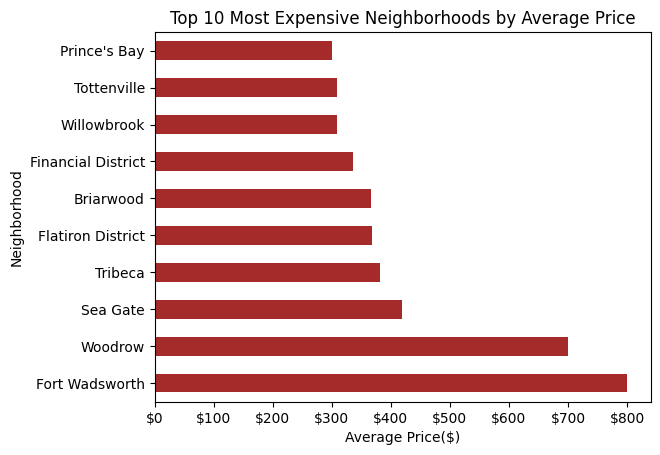

In [41]:
# our goal is to make a chart reflecting the top 10 most expensive Neighborhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighborhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a dataframe that sorts the neighborhood field by decending price.  
# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.

# so we first want to group the data and then we calculate the average
neighborhood_avg_price = df_data.groupby('neighbourhood')['price'].mean().reset_index()

print(neighborhood_avg_price)

# now we only want the top 10 SORTED!
top_10_neighborhoods = neighborhood_avg_price.sort_values(by='price', ascending=False).head(10)

print(top_10_neighborhoods)

# now we plot...
fig, ax = plt.subplots() 
top_10_neighborhoods.plot.barh(x='neighbourhood', y='price', legend=False, color='brown', ax=ax)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x):,}'))

plt.xlabel('Average Price($)')
plt.ylabel('Neighborhood')
plt.title('Top 10 Most Expensive Neighborhoods by Average Price')
plt.show()


                  neighbourhood      price
181                 South Beach  45.000000
27                  Bull's Head  49.666667
157               Port Richmond  51.222222
180                   Soundview  52.055556
141                New Brighton  52.250000
9    Bay Terrace, Staten Island  55.000000
103                 Hunts Point  56.583333
201          University Heights  57.826087
89                   Grant City  58.400000
150                   Olinville  59.428571


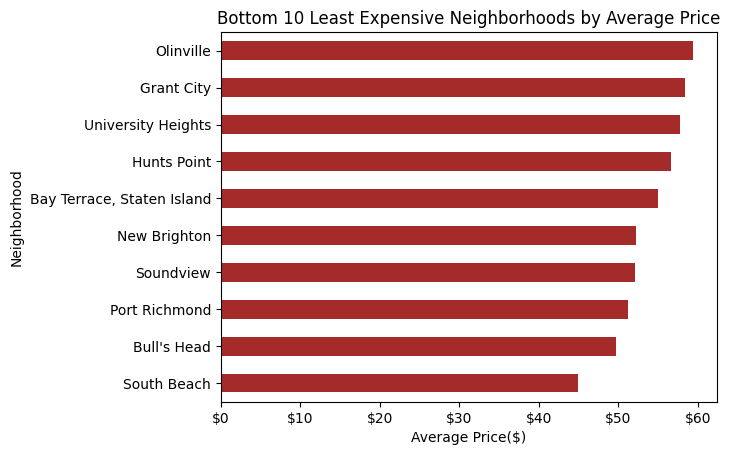

In [39]:
# Now, display the top 10 datframe you created as a table with columns
# neighbourhood and price

#now we plot...
bottom_10_neighborhoods = neighborhood_avg_price.sort_values(by='price', ascending=True).head(10)

print(bottom_10_neighborhoods)

fig, ax = plt.subplots() 
bottom_10_neighborhoods.plot.barh(x='neighbourhood', y='price', legend=False, color='brown', ax=ax)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x):,}'))

plt.xlabel('Average Price($)')
plt.ylabel('Neighborhood')
plt.title('Bottom 10 Least Expensive Neighborhoods by Average Price')
plt.show()



####  Exercise 2: Create a bar chart and dataframe of top 10 Neigborhoods that have the LEAST expensive listsings on average. 

Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Bew wure to provide a pivot table.

In [37]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.





In [38]:
# we also would like to have the corresponding pivot table of the lowest 10



#  Now make all four widgets (the two charts and the two dataframes) in a Tableau dashboard!